# Multilayer Perceptron Classifie

## Data Preprocessing

In [3]:
from matplotlib import pyplot as plt
import sklearn
import sklearn.tree
import numpy as np
from io import StringIO
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import time

df = pd.read_csv('digits.csv')
df.head() 



,label,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,...,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13
0,7,0,0,0,0,0,0,0,0,0,...,0,0,41,88,3,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


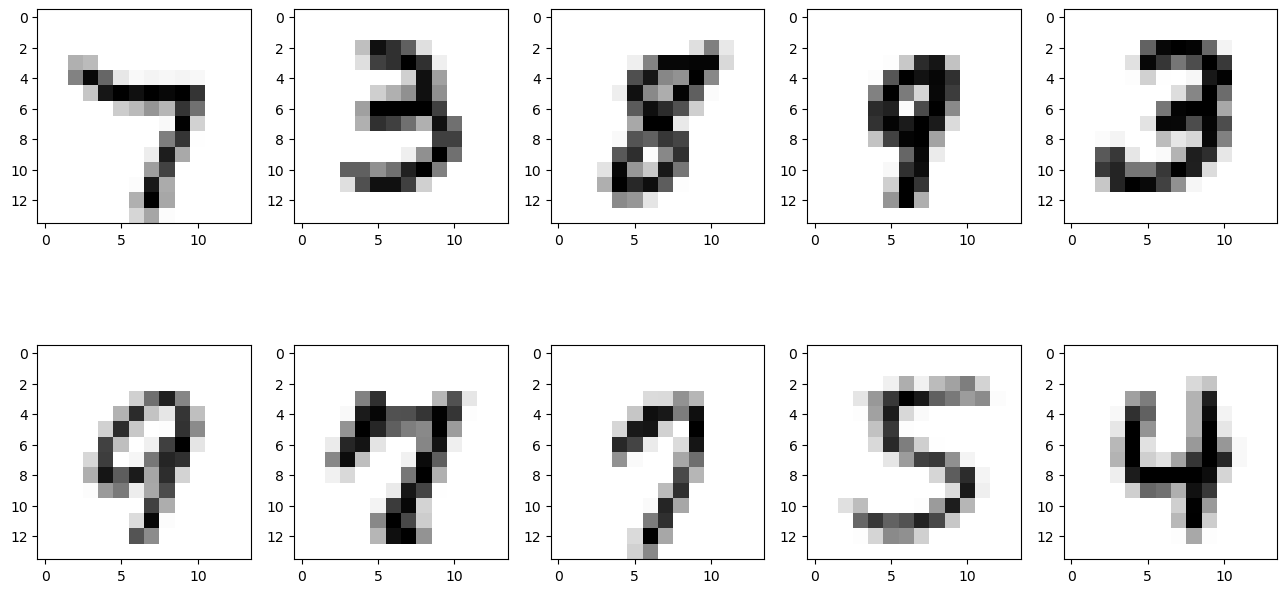

[7 3 8 9 3 9 7 7 5 4]


In [4]:
#  A view of a portion of this data
X = df.drop("label", axis=1).values
y = df["label"].values

fig = plt.figure(figsize=(16,8))
for i in range(10):
    for j in range(y.shape[0]):
        if y[j] == i:
            ax = fig.add_subplot(2, 5, i+1)
            ax.imshow(X[i].reshape(14,14), cmap=plt.cm.gray_r)
            break
plt.show()
print(y[0:10])

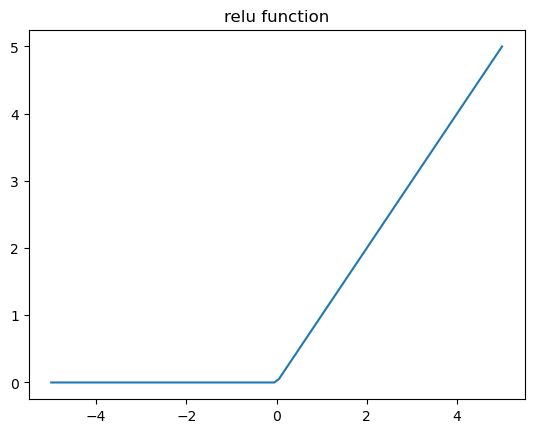

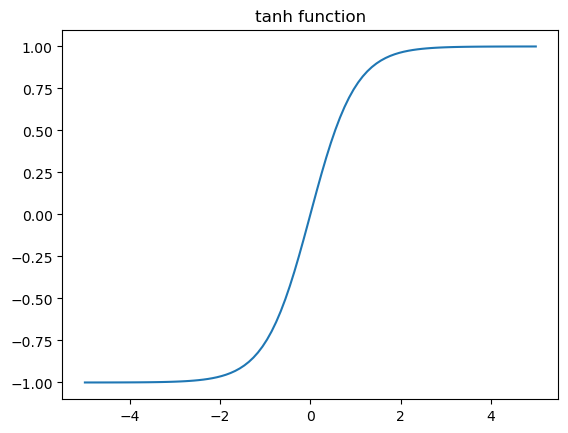

In [5]:
x = np.linspace(-5, 5, 100)
f = plt.figure()
plt.title("relu function")
plt.plot(x, np.maximum(0, x))


f = plt.figure()
plt.title("tanh function")
plt.plot(x, np.tanh(x))

## KFold, Scalling, Model 

In [6]:
# KFold provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds
kfold = model_selection.KFold(5, shuffle=True, random_state=2)


In [7]:
def MPC(X, y, layers, func):
    prec, rec, f1 = [], [], []
    # Time spent
    start = time.time()
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        mlp_clf = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, activation=func, random_state=2, solver="lbfgs") # number of hidden layers is passed to the classifier
        X_scaler = preprocessing.MinMaxScaler()

        X_train = X_scaler.fit_transform(X_train)    

        mlp_clf.fit(X_train, y_train)

        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        print(y_pred)
        print(y_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
        
        
      
        

        print()
    
    time_spent = time.time() - start
    print("Time: ", time_spent)

    print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    
    return time_spent

In [8]:
MPC(X, y, (20, 20),'relu')

[9 7 0 ... 7 2 5]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 7]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 7 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  10.425442934036255
recall    = 0.9100 ±0.0087
precision = 0.9107 ±0.0088
f1        = 0.9100 ±0.0087


10.425442934036255

In [9]:
MPC(X, y, (100, 100), 'relu')

[9 7 0 ... 7 2 5]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 9]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 9 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  20.43543291091919
recall    = 0.9395 ±0.0082
precision = 0.9403 ±0.0079
f1        = 0.9396 ±0.0082


20.43543291091919

In [10]:
MPC(X, y, (20, 20, 20, 20, 20), 'relu')

[9 7 0 ... 7 2 8]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 9]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 4 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  41.942862033843994
recall    = 0.9063 ±0.0080
precision = 0.9072 ±0.0077
f1        = 0.9064 ±0.0080


41.942862033843994

In [11]:
MPC(X, y, (100, 100, 100, 100, 100), 'relu')

[9 7 0 ... 7 2 5]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 7]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 9 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  52.07856011390686
recall    = 0.9370 ±0.0070
precision = 0.9377 ±0.0068
f1        = 0.9371 ±0.0070


52.07856011390686

In [12]:
MPC(X, y, (20, 20),'tanh')

[9 7 0 ... 7 2 5]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 2]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 7 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  6.491062164306641
recall    = 0.9130 ±0.0102
precision = 0.9141 ±0.0104
f1        = 0.9131 ±0.0102


6.491062164306641

In [13]:
MPC(X, y, (100, 100), 'tanh')

[9 7 0 ... 7 2 5]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 9]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 9 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  9.9478120803833
recall    = 0.9352 ±0.0085
precision = 0.9357 ±0.0084
f1        = 0.9351 ±0.0085


9.9478120803833

In [14]:
MPC(X, y, (20, 20, 20, 20, 20), 'tanh')

[9 7 0 ... 7 2 8]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 3]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 9 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  15.89641809463501
recall    = 0.9072 ±0.0105
precision = 0.9085 ±0.0101
f1        = 0.9072 ±0.0104


15.89641809463501

In [15]:
MPC(X, y, (100, 100, 100, 100, 100), 'tanh')

[9 7 0 ... 7 2 5]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 2]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 9 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  28.367899179458618
recall    = 0.9397 ±0.0070
precision = 0.9404 ±0.0070
f1        = 0.9397 ±0.0070


28.367899179458618

## The time it takes to fit each model as size of layers increase for various layer sizes

In [16]:
def MPC2(X, y, layers, func): # Without the time spent for calculating the score
   
    # Time spent
    start = time.time()
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        mlp_clf = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, activation=func, random_state=2, solver="lbfgs") # number of hidden layers is passed to the classifier
        X_scaler = preprocessing.MinMaxScaler()

        X_train = X_scaler.fit_transform(X_train)    

        mlp_clf.fit(X_train, y_train)

        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)
    
    time_spent = time.time() - start
    print("Time: ", time_spent)

    
    return time_spent

Time:  6.203898906707764
Time:  6.403615236282349
Time:  6.5465967655181885
Time:  7.170476913452148
Time:  9.22623610496521


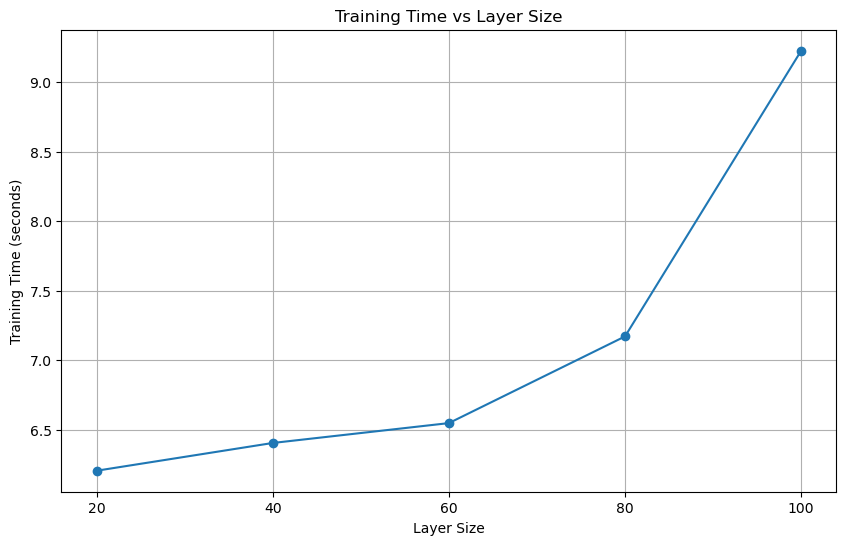

In [20]:
training_time = [
    MPC2(X, y, (20, 20), 'tanh'),
    MPC2(X, y, (40, 40), 'tanh'),
    MPC2(X, y, (60, 60), 'tanh'),
    MPC2(X, y, (80, 80), 'tanh'),
    MPC2(X, y, (100, 100), 'tanh')
]


layer_sizes = [20, 40, 60, 80, 100]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(layer_sizes, training_time, marker='o')
plt.title('Training Time vs Layer Size')
plt.xlabel('Layer Size')
plt.ylabel('Training Time (seconds)')
plt.xticks(layer_sizes)
plt.grid(True)
plt.show()



## The time it takes to fit each model as number of layers increase 

Time:  6.67429518699646
Time:  6.661713123321533
Time:  8.138581991195679
Time:  12.334396123886108
Time:  15.836822032928467


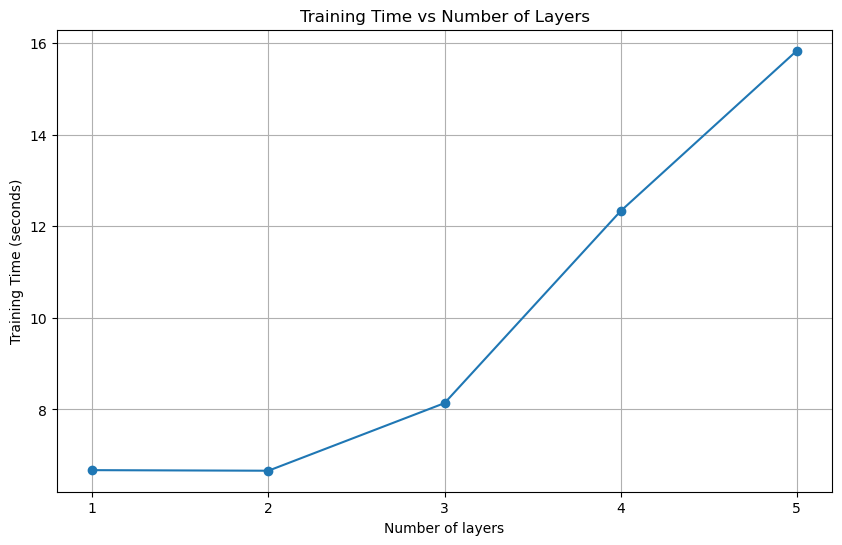

In [30]:
training_time = [
    MPC2(X, y, (20), 'tanh'),
    MPC2(X, y, (20, 20), 'tanh'),
    MPC2(X, y, (20, 20, 20), 'tanh'),
    MPC2(X, y, (20, 20, 20, 20), 'tanh'),
    MPC2(X, y, (20, 20, 20, 20, 20), 'tanh')
]


layer_sizes = [1,2,3,4,5]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(layer_sizes, training_time, marker='o')
plt.title('Training Time vs Number of Layers')
plt.xlabel('Number of layers')
plt.ylabel('Training Time (seconds)')
plt.xticks(layer_sizes)
plt.grid(True)
plt.show()


## If stop using MinMaxScaler, different learning rate

In [21]:
def MPC_without_MinMaxScaler(X, y, layers, func):
    prec, rec, f1 = [], [], []
    # Time spent
    start = time.time()
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        mlp_clf = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, activation=func, random_state=2, solver="lbfgs") # number of hidden layers is passed to the classifier
#         X_scaler = preprocessing.MinMaxScaler()

#         X_train = X_scaler.fit_transform(X_train)    

        mlp_clf.fit(X_train, y_train)

#         X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        print(y_pred)
        print(y_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
        
        
      
        

        print()
    
    time_spent = time.time() - start
    print("Time: ", time_spent)

    print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    
    return time_spent

MPC_without_MinMaxScaler(X, y, (20, 20),'tanh')

/Users/juichilee/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[9 5 0 ... 7 2 5]
[9 7 0 ... 7 2 5]



/Users/juichilee/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[8 3 9 ... 6 8 7]
[8 3 9 ... 0 8 3]



/Users/juichilee/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[4 5 7 ... 5 8 1]
[4 5 1 ... 5 3 1]



/Users/juichilee/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[7 5 1 ... 5 9 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  70.83340811729431
recall    = 0.8588 ±0.0109
precision = 0.8608 ±0.0106
f1        = 0.8591 ±0.0109


/Users/juichilee/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70.83340811729431

In [101]:
MPC(X, y, (20, 20),'tanh')

[9 7 0 ... 7 2 5]
[9 7 0 ... 7 2 5]

[8 3 9 ... 0 8 7]
[8 3 9 ... 0 8 3]

[4 5 1 ... 5 3 1]
[4 5 1 ... 5 3 1]

[7 5 1 ... 5 7 2]
[7 5 1 ... 5 9 2]

[7 3 2 ... 6 1 7]
[7 3 2 ... 6 1 7]

Time:  11.28397798538208
recall    = 0.9100 ±0.0087
precision = 0.9107 ±0.0088
f1        = 0.9100 ±0.0087


11.28397798538208

In [28]:
# def MPC_different_leaning_rate(X, y, layers, func, learning_rate):
#     prec, rec, f1 = [], [], []
#     # Time spent
#     start = time.time()
    
#     for train_idx, test_idx in kfold.split(X):
#         X_train, X_test = X[train_idx], X[test_idx]
#         y_train, y_test = y[train_idx], y[test_idx]

#         mlp_clf = MLPClassifier(hidden_layer_sizes=layers, learning_rate_init=learning_rate, max_iter=1000, activation=func, random_state=2, solver="lbfgs") # number of hidden layers is passed to the classifier
#         X_scaler = preprocessing.MinMaxScaler()

#         X_train = X_scaler.fit_transform(X_train)    

#         mlp_clf.fit(X_train, y_train)

#         X_test = X_scaler.transform(X_test)
#         y_pred = mlp_clf.predict(X_test)

#         print(y_pred)
#         print(y_test)

#         rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
#         prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
#         f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
        
        
      
        

#         print()
    
#     time_spent = time.time() - start
#     print("Time: ", time_spent)

#     print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
#     print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
#     print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    
#     return time_spent


In [29]:
# MPC_different_leaning_rate(X, y, (100, 100),'relu', 0.5)